## Simulação de Investimento

#### Bibliotecas

In [1]:
import yfinance as yf                     # biblioteca para obtenção de dados de Investimento
import requests                           # biblioteca para fazer requisições na Internet
import pandas as pd                       # biblioteca Pandas para manipulação de dados
pd.set_option('mode.chained_assignment', None)
import numpy as np                        # biblioteca Numpy para manipulação de dados numéricos
from datetime import date                 # funções para manipulação de datas
import math                               # módulo para operações matemáticas
import matplotlib.pyplot as plt           # biblioteca para plotar e configurar gráficos
import warnings
warnings.filterwarnings('ignore')

### Simulação: comprando ações do Ticker selecionado por 10 anos

In [2]:
ticker = input("Digite o código da ação desejada: ")
tempo_de_simulacao = 10
aporte_mensal = 500.00

Digite o código da ação desejada: VALE3.SA


### Obtendo os dados históricos do Ticker

In [3]:
data_hoje = date.today()
data_inicio = f'{data_hoje.year-tempo_de_simulacao}-{data_hoje.month}-{data_hoje.day}'
dados = yf.Ticker(ticker).history(start=data_inicio)

In [4]:
# passo 1:
# criando DataFrame para registro do patrimônio
simulacao1 = pd.DataFrame(columns=['Data', 'Caixa', 'Qtd de Ações', 'Patrimônio'])

In [5]:
# passo 2:
# registrando a condição inicial da simulação
recurso_aporte = aporte_mensal
cotacao_na_data = dados['Close'][0].round(2)

qtd_acoes_compradas = math.floor(recurso_aporte/cotacao_na_data)
sobra = (recurso_aporte % cotacao_na_data).round(2)
mes_corrente = dados.index[0].month

registro_inicial = {
    'Data': dados.index[0],
    'Caixa': sobra,
    'Qtd de Ações': qtd_acoes_compradas,
    'Patrimônio': (qtd_acoes_compradas*cotacao_na_data)+sobra
}

simulacao1 = simulacao1.append(registro_inicial, ignore_index=True)

In [6]:
# Passo 3:
# registrando a evolução do patrimônio
for i in range(1, len(dados)):
    cotacao_na_data = dados['Close'][i].round(2)
    
    #>> se ainda não virou o mês, apenas contabiliza quanto está valendo o patrimônio
    if dados.index[i].month == mes_corrente:
        novo_registro = {
            'Data': dados.index[i],
            'Caixa': simulacao1['Caixa'].iloc[-1],
            'Qtd de Ações': simulacao1['Qtd de Ações'].iloc[-1],
            'Patrimônio': (simulacao1['Qtd de Ações'].iloc[-1] * cotacao_na_data) + simulacao1['Caixa'].iloc[-1]
        }
    
    #>> se virou o mês, registra uma nova compra
    else:
        recurso_aporte = simulacao1['Caixa'].iloc[-1] + aporte_mensal
        qtd_acoes_compradas = math.floor(recurso_aporte/cotacao_na_data)
        sobra = (recurso_aporte % cotacao_na_data).round(2)
        mes_corrente = dados.index[i].month
        
        novo_registro = {
           'Data': dados.index[i],
           'Caixa': sobra,
           'Qtd de Ações': simulacao1['Qtd de Ações'].iloc[-1] + qtd_acoes_compradas,
           'Patrimônio': ((simulacao1['Qtd de Ações'].iloc[-1] + qtd_acoes_compradas) * cotacao_na_data) + sobra
        }
    
    #>> verifica se houve desdobramento/grupamento e faz o ajuste
    if dados['Stock Splits'].iloc[i] > 0.0:
        novo_registro['Qtd de Ações'] = math.floor(novo_registro['Qtd de Ações'] * dados['Stock Splits'].iloc[i])
        novo_registro['Patrimônio'] = novo_registro['Patrimônio'] * dados['Stock Splits'].iloc[i]
    
    #>> adiciona o registro no DataFrame da simulação
    simulacao1 = simulacao1.append(novo_registro, ignore_index=True)

In [7]:
simulacao1

,Data,Caixa,Qtd de Ações,Patrimônio
0,2013-09-16 00:00:00-03:00,12.08,24,500.00
1,2013-09-17 00:00:00-03:00,12.08,24,501.44
2,2013-09-18 00:00:00-03:00,12.08,24,501.92
3,2013-09-19 00:00:00-03:00,12.08,24,499.76
4,2013-09-20 00:00:00-03:00,12.08,24,491.60
...,...,...,...,...
2480,2023-09-08 00:00:00-03:00,36.69,2633,175684.12
2481,2023-09-11 00:00:00-03:00,36.69,2633,178211.80
2482,2023-09-12 00:00:00-03:00,36.69,2633,178080.15
2483,2023-09-13 00:00:00-03:00,36.69,2633,177395.57


### Exibindo grafiamente a evolução do patrimônio

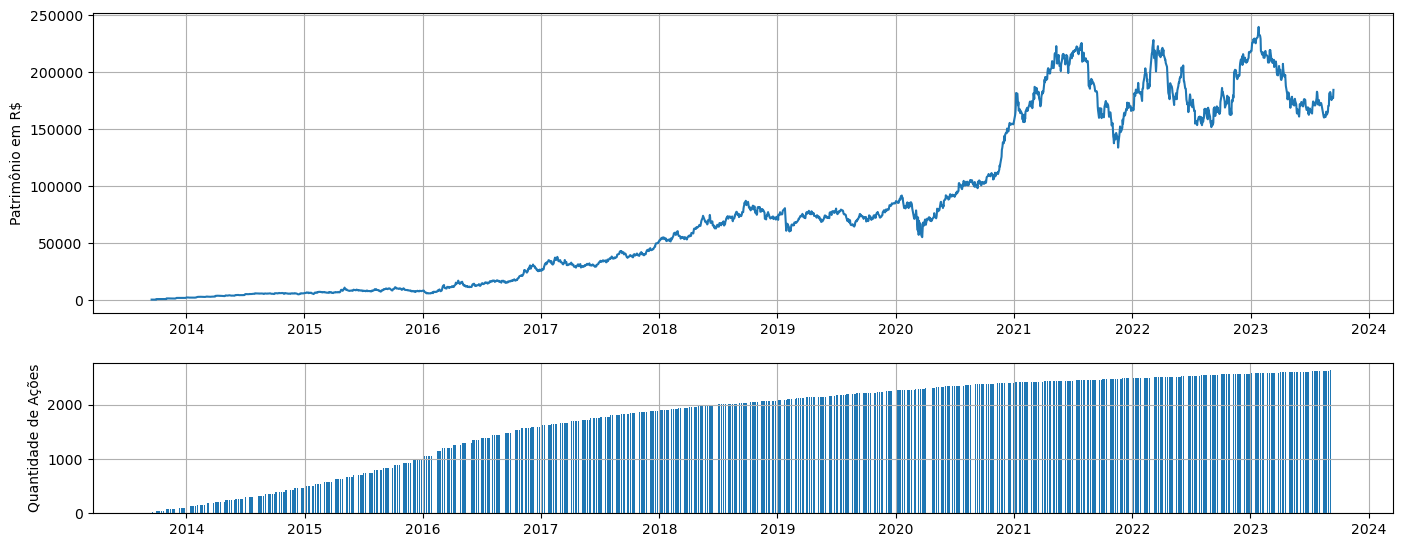

In [8]:
plt.style.use('default')
fig = plt.figure(figsize=(13,5))

grafico_patrimonio = fig.add_axes((0, 0.40, 1, 0.60))
grafico_acoes = fig.add_axes((0, 0, 1, 0.30))

grafico_patrimonio.plot(simulacao1['Data'], simulacao1['Patrimônio'])
grafico_patrimonio.set_ylabel('Patrimônio em R$')
grafico_patrimonio.grid(True)

grafico_acoes.bar(simulacao1['Data'], simulacao1['Qtd de Ações'])
grafico_acoes.set_ylabel('Quantidade de Ações')
grafico_acoes.grid(True)

plt.show()